In [11]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

TO DO:
- re-run all models with objective functions, rep 20

In [26]:
# Specify the file path
name = 'acquisition_20_mlp'
#'bayer_gaussian_10_ei' #'bayer_objective_big_mlp','gold_sample_100_only_mlp' # 'gold_sample_10_ratio_1.14', 'gold_sample_100_ratio_1.14'
score_path = 'active_result/interation_'+ name +'_score.json'
yield_path = 'active_result/interation_'+ name +'_yield.json'

# Open the JSON data to a file
with open(score_path, "r") as json_file:
    data_score = json.load(json_file)

with open(yield_path, "r") as json_file:
    data_yield = json.load(json_file)

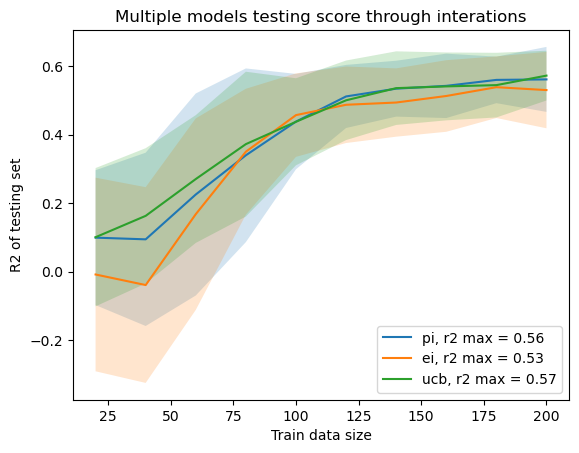

In [27]:
interation_mean = {}
interation_std = {}
label = []
for key, value in data_score.items():
    interation_mean[key] = np.mean(value, axis = 0)
    interation_std[key] = np.std(value, axis = 0)
    label.append(key)

interation_mean = pd.DataFrame(interation_mean)
interation_std = pd.DataFrame(interation_std)
n = 10
x = np.array(range(interation_std.shape[0])) + 1
#x = np.array(range(n)) + 1

for name in label:
    y = interation_mean[name][0:n]
    std = interation_std[name][0:n]
#    y = interation_mean[name]
#    std = interation_std[name]
#    name = f"{name}, r2 max = {round(max(y),2)}"
    name = f"{name}, r2 max = {round(y[9],2)}"
    plt.plot(x*20, y, label=name)
    plt.fill_between(x*20, y - std, y + std, alpha=0.2)

# Add labels and title
plt.xlabel('Train data size')
plt.ylabel('R2 of testing set')
plt.title('Multiple models testing score through interations')

# Add a legend
plt.legend(loc='lower right')

# Show the plot
plt.show()

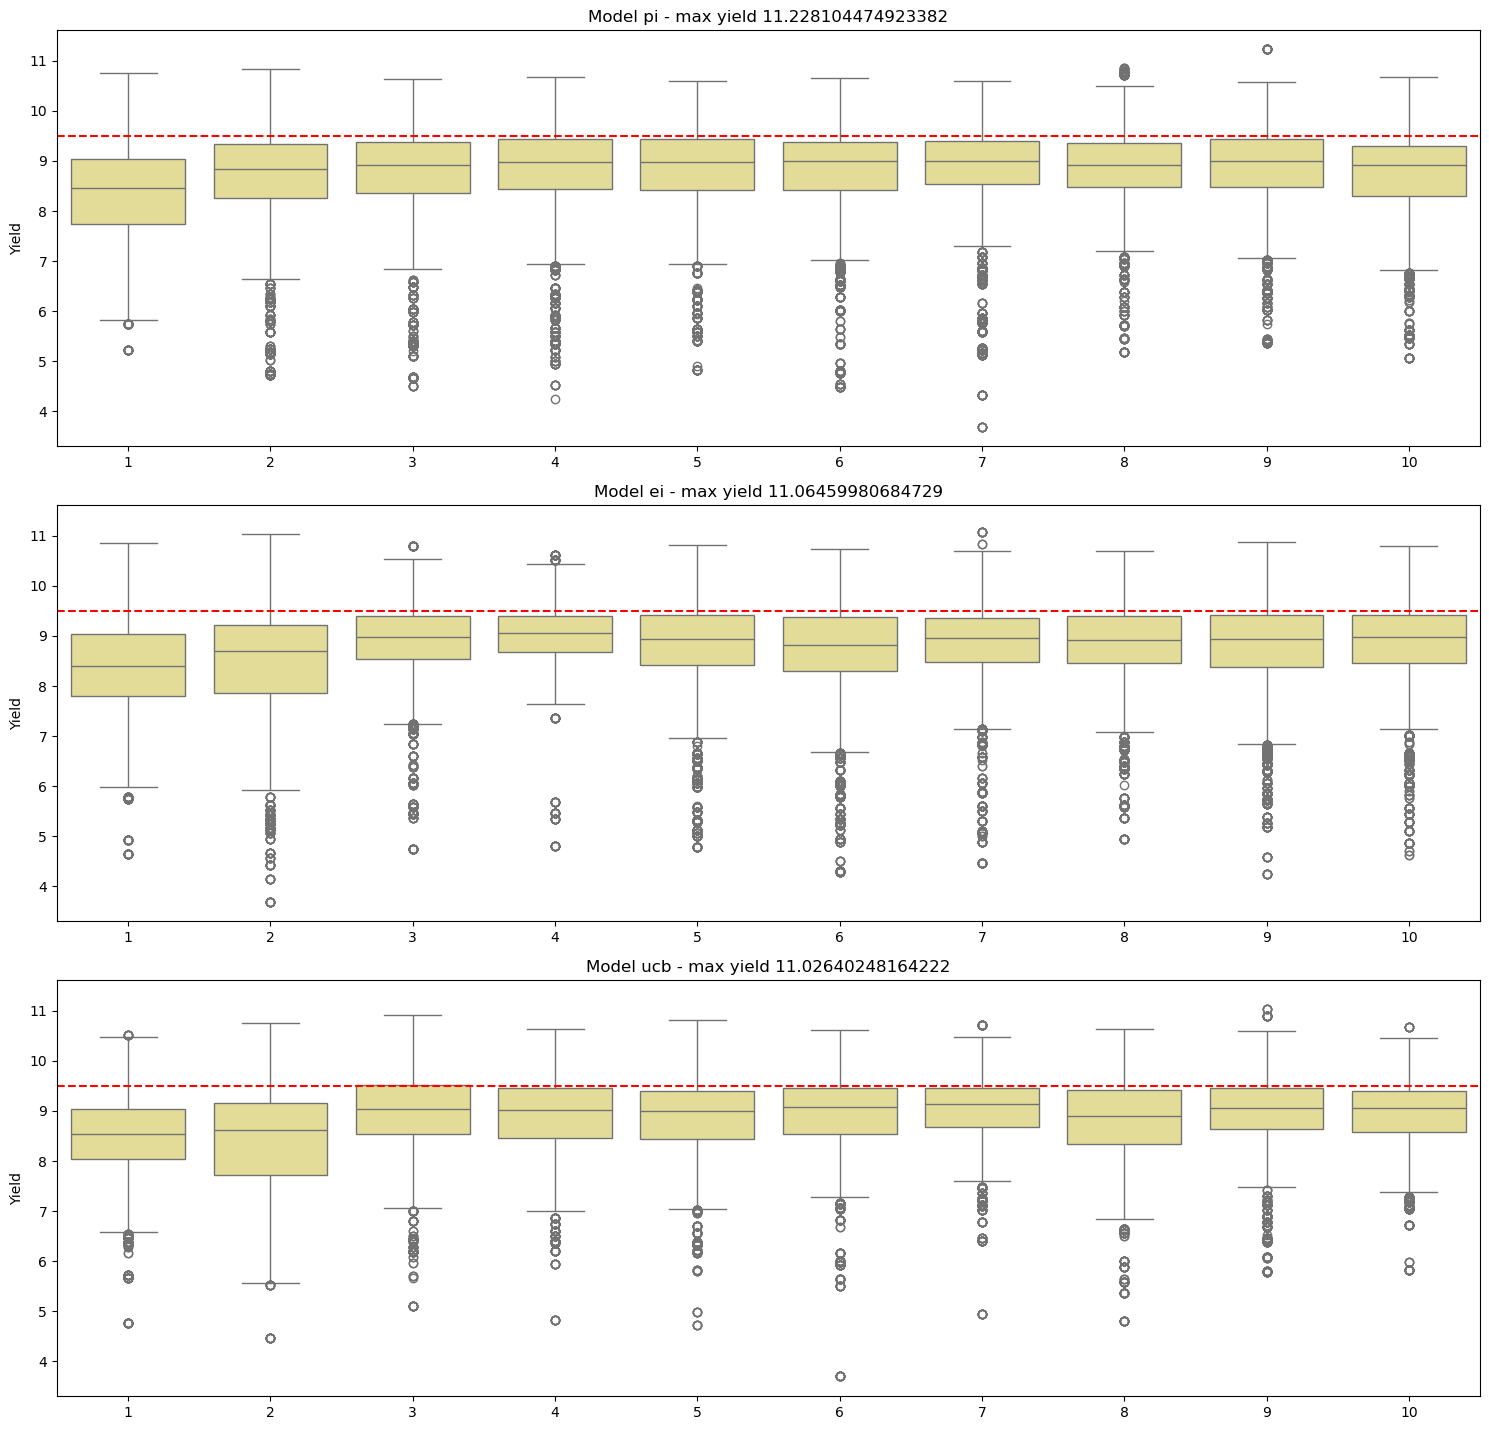

In [28]:
name =  ['pi','ei','ucb']
#name = ['gp']
dict = {}
for n in name:
    df = pd.DataFrame([])
    for i in range(len(x)):
        ele = []
        for y in data_yield[n]:
            ele.append(y[i])
            inter = pd.DataFrame({'interation':i + 1,
                            'yield':np.array(ele).ravel()})
            df = pd.concat([df,inter])
    dict[n] = df


# Create a single figure with 5 subplots (box plots)
if len(name) > 1:
    fig, axes = plt.subplots(len(name), 1, figsize=(15, 15), sharey=True)

    # Iterate over the subplots and create a box plot for each group
    for i, ax in enumerate(axes):
        data = dict[name[i]]
        max_yield = max(data.loc[:,'yield'])
    #    data= data[data.interation<(n+1)]
        sns.boxplot(x='interation', y='yield', data = data, ax = ax, color='khaki')
    # sns.boxplot(x='interation', y='yield', data = dict['mlp'], ax = axes, color='khaki')

        ax.axhline(y=9.5, color='red', linestyle='--', label='theory maximum')
        ax.set_title(f'Model {name[i]} - max yield {max_yield}')
        ax.set_ylabel('Yield')
        ax.set(xlabel=None)

    # Adjust layout to prevent clipping of titles
    plt.tight_layout(rect=[0, 0, 1, 0.96])
else: 
    data = dict[name[0]]
    max_yield = max(data.loc[:,'yield'])
    #    data= data[data.interation<(n+1)]
    sns.boxplot(x='interation', y='yield', data = data, color='khaki')
    plt.axhline(y=9.5, color='red', linestyle='--', label='theory maximum')
    # sns.boxplot(x='interation', y='yield', data = dict['mlp'], ax = axes, color='khaki')
    plt.title(f'Acquisation {name[0]} - max yield {max_yield}')
    plt.ylabel('Yield')
    plt.xlabel(xlabel=None)
# Show the plot
plt.show()

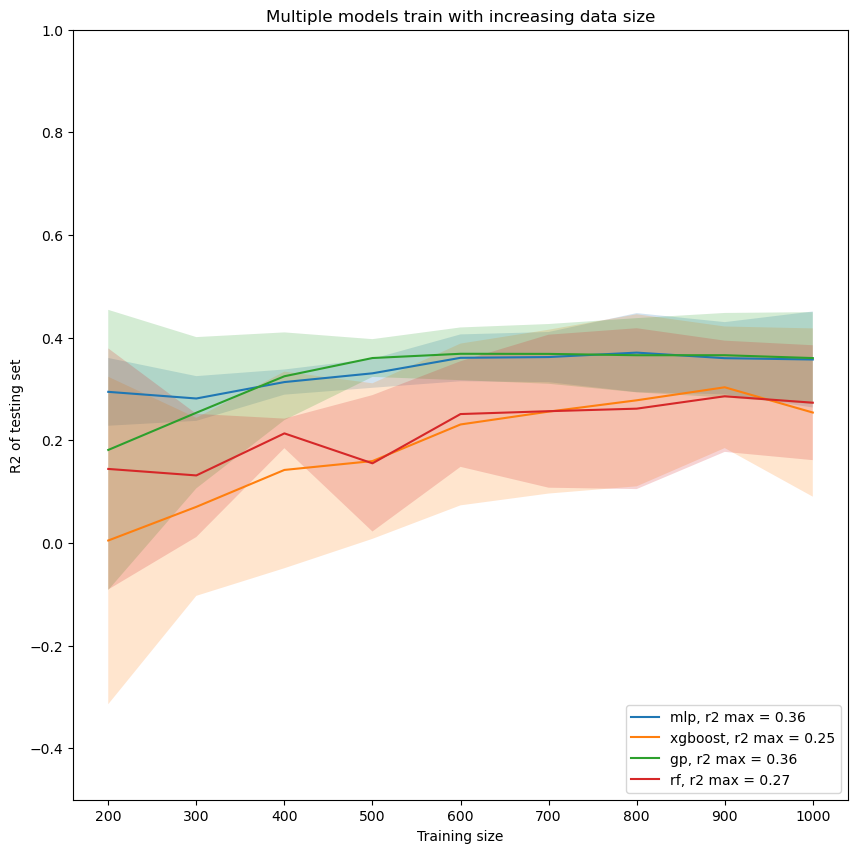

In [9]:
result_data = pd.read_csv('active_result/testing_accumulated_data_step100_3.csv')
result = result_data.groupby('size').agg({'mlp': ['mean', 'std'], 'xgboost': ['mean', 'std'], 'gp': ['mean', 'std'], 'rf': ['mean', 'std']}).reset_index()
result = result.iloc[1:10,:]

x = result[['size']].to_numpy().ravel()
label = ['mlp','xgboost','gp','rf']

# Set figure size
plt.figure(figsize=(10, 10))  # Adjust width and height as needed


for name in label:
    y = result[[name]].iloc[:,0]
    std = result[[name]].iloc[:,1]
#    y = interation_mean[name]
#    std = interation_std[name]
#    name = f"{name}, r2 max = {round(max(y),2)}"
    name = f"{name}, r2 max = {round(y[9],2)}"
    plt.plot(x, y, label=name)
    plt.fill_between(x, y - std, y + std, alpha=0.2)

# Set y-axis limits
plt.ylim([-0.5, 1])  # Replace 'lower_limit' and 'upper_limit' with your desired limits
# Add labels and title
plt.xlabel('Training size')
plt.ylabel('R2 of testing set')
plt.title('Multiple models train with increasing data size')

# Add a legend
plt.legend(loc='lower right')

# Show the plot
plt.show()